**1.KNN**


*   Import Libaries / Dataset
*   data analysis and finding null values
*   handling null values and data normalisation
*   train test split
*   Knn classifier with k neighbours
*   classification report , confusion matrix







In [ ]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#Loading the dataset
diabetes_data = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
# handling null values
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

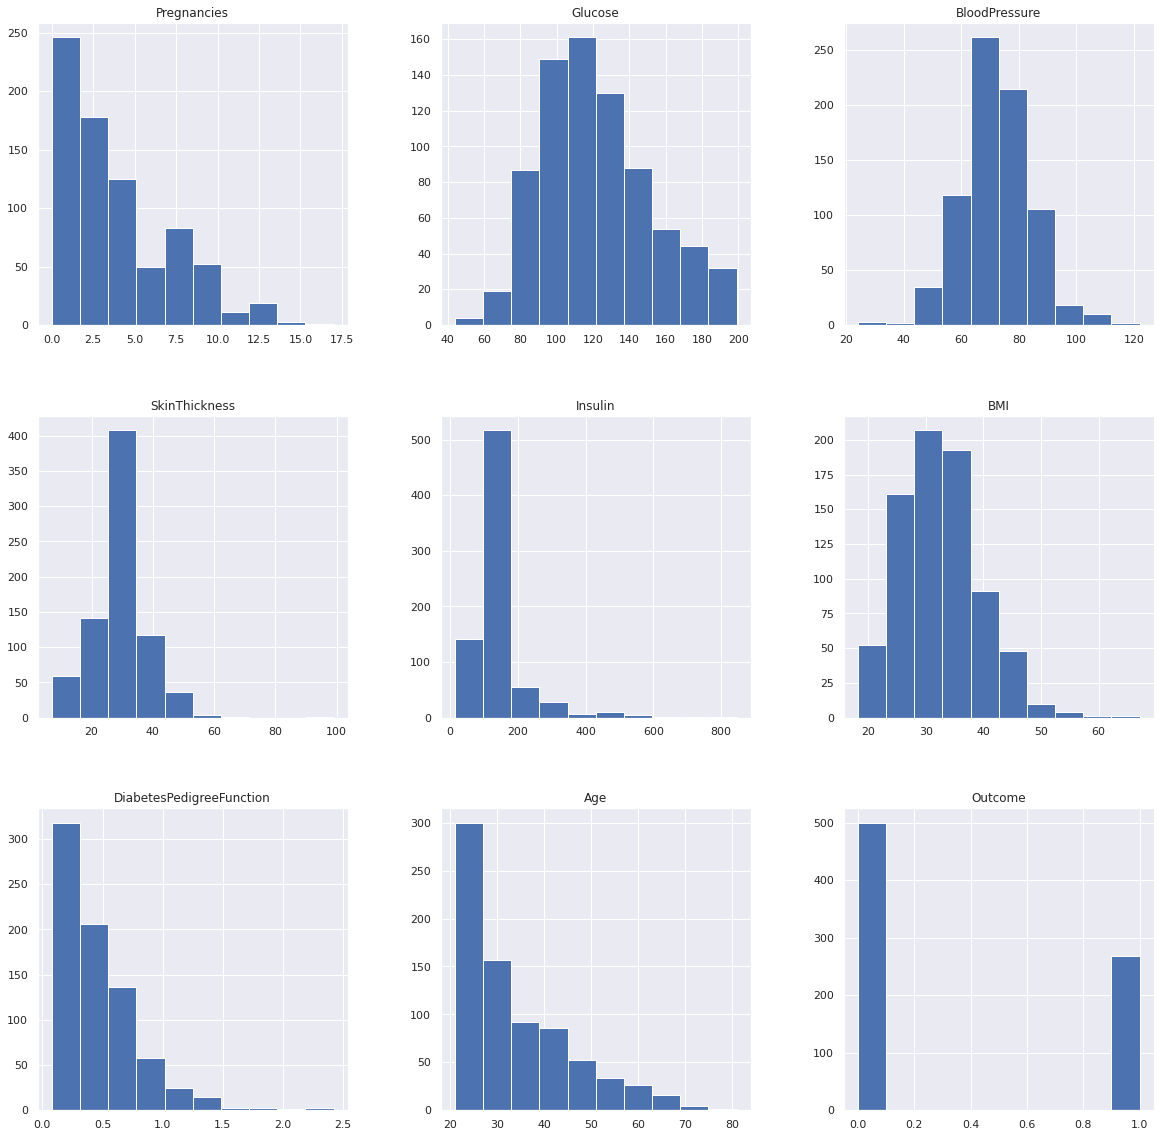

In [ ]:
#plotting after nan removal
p = diabetes_data_copy.hist(figsize = (20,20))

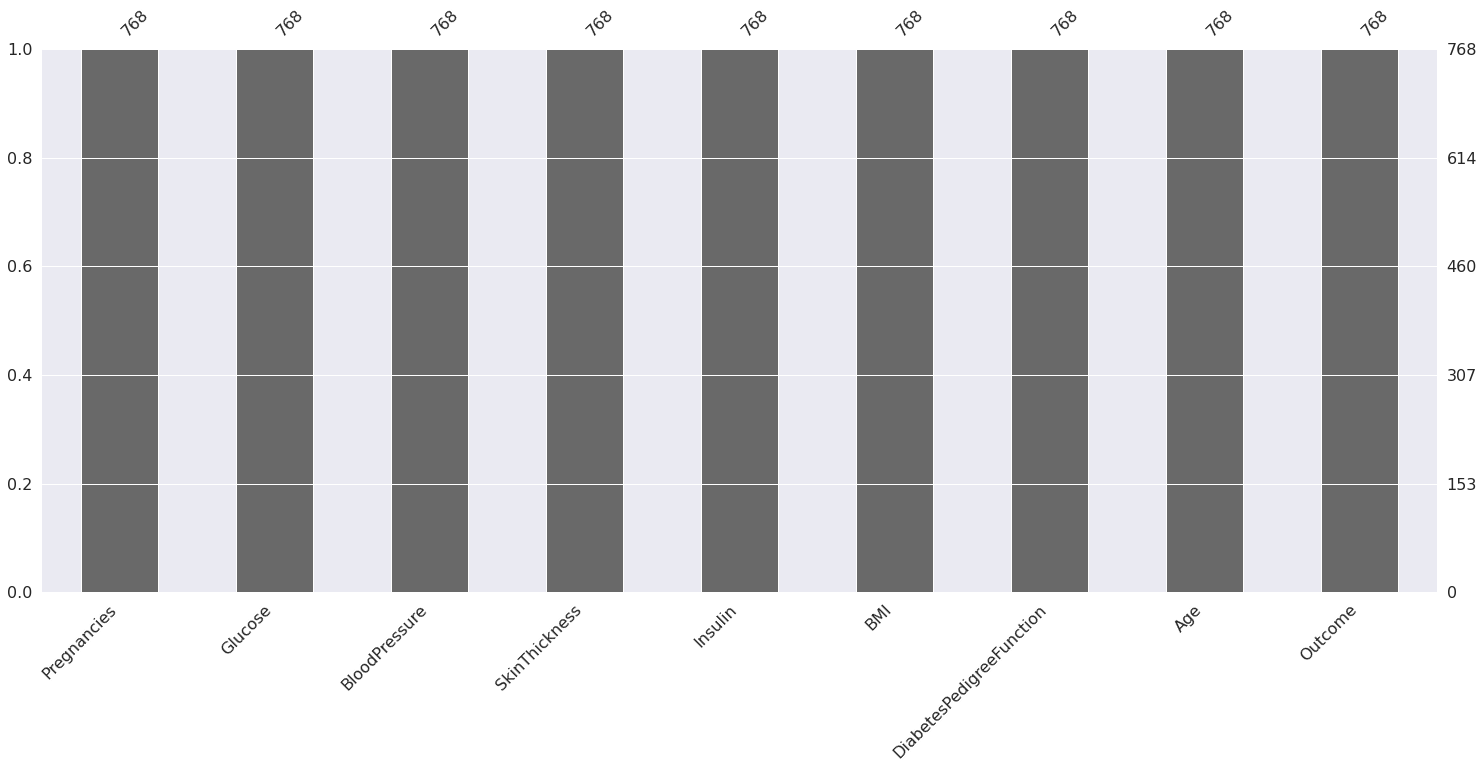

In [ ]:
## null count analysis
import missingno as msno
p=msno.bar(diabetes_data)

In [ ]:
#normalization
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [ ]:
y = diabetes_data_copy.Outcome

In [ ]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []
for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)

    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [ ]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [ ]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.5625 % and k = [11]


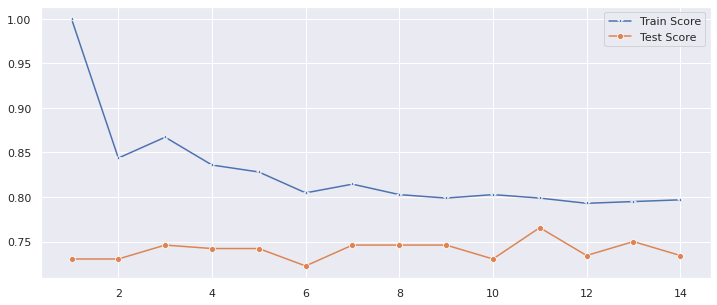

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.765625

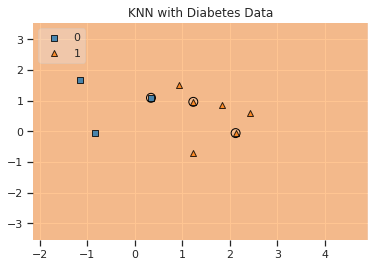

In [ ]:
### trying to plot decision boundary
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2,
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

# Adding axes annotations
#plt.xlabel('sepal length [cm]')
#plt.ylabel('petal length [cm]')
plt.title('KNN with Diabetes Data')
plt.show()

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,142,25,167
1,35,54,89
All,177,79,256


Text(0.5, 12.5, 'Predicted label')

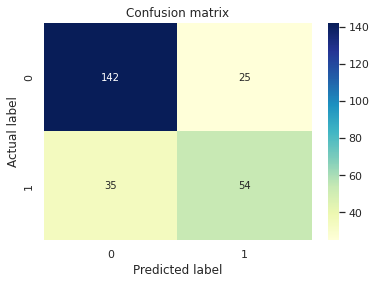

In [ ]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



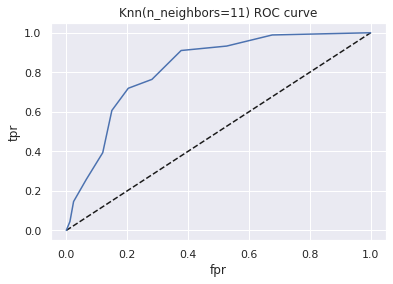

Area Under ROC curve


0.8193500639171096

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()
#Area under ROC curve
print('Area Under ROC curve')
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

**2. SVM**

*   importing libraries/dataset
*   train/test split
*   normalisation
*   define SVM classifier
*   SVM classifier training and prediction based on SVM
*   confusion matrix, classification report




In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
%matplotlib inline
import matplotlib.pyplot as plt


In [ ]:
#Loading the dataset
data = pd.read_csv('/content/drive/MyDrive/diabetes.csv')


In [ ]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
data['Outcome'].value_counts(normalize=True).apply(lambda x:x*100)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [ ]:
#X and y created as the input and output datasets respectively of the diabetes classification

In [ ]:
y=data['Outcome']
y.shape

(768,)

In [ ]:
X=data.copy()
X.pop('Outcome')
X.shape

(768, 8)

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train.shape,X_test.shape

((614, 8), (154, 8))

In [ ]:
print(X_train)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
603            7      150             78             29      126  35.2   
118            4       97             60             23        0  28.2   
247            0      165             90             33      680  52.3   
157            1      109             56             21      135  25.2   
468            8      120              0              0        0  30.0   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
192            7      159             66              0        0  30.4   
629            4       94             65             22        0  24.7   
559           11       85             74              0        0  30.1   
684            5      136             82              0        0   0.0   

     DiabetesPedigreeFunction  Age  
603                     0.692   54  
118                     0.443   22  


In [ ]:
#normalisation
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
X_train=s.fit_transform(X_train)
X_test=s.transform(X_test)
print(X_train)

[[ 0.90832902  0.91569367  0.44912368 ...  0.37852648  0.67740401
   1.69955804]
 [ 0.03644676 -0.75182191 -0.47230103 ... -0.50667229 -0.07049698
  -0.96569189]
 [-1.12606292  1.38763205  1.06340683 ...  2.54094063 -0.11855487
  -0.88240283]
 ...
 [ 0.03644676 -0.84620959 -0.21634972 ... -0.94927168 -0.95656442
  -1.04898095]
 [ 2.0708387  -1.12937261  0.24436264 ... -0.26640405 -0.50001442
   0.11706589]
 [ 0.32707418  0.47521786  0.65388473 ... -4.07275877  0.52121586
   2.94889395]]


In [ ]:
# Defining the SVM classification model
from sklearn.svm import SVC
SVM_classifier = SVC(kernel = 'linear', random_state = 0)

In [ ]:
# Training the SVM classifier
SVM_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
# Making predictions with the test data
y_pred = SVM_classifier.predict(X_test)

In [ ]:
# Combining the predicted and actual values
output=pd.DataFrame(data={'Predicted Labels': y_pred, 'Actual Labels': y_test})
output.to_csv("output.csv")
print("Saved!")

Saved!


In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[98  9]
 [18 29]]


In [ ]:
# Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8246753246753247

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



**3. Decision tree**

*   importing libraries/ dataset
*   data analysis
*   model/ classifier
*   accuracy, decision tree visulization
*   classifcation report





In [ ]:
#Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # or DecisionTreeRegressor
from sklearn import metrics
import warnings
warnings.simplefilter(action='ignore')
plt.style.use ('seaborn')

In [ ]:
#Loading the dataset
data2 = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

In [ ]:
data2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
x=pd.DataFrame(data2,columns=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

y=data2.Outcome.values.reshape(-1,1)# Target variable

In [ ]:
x_train, x_test, y_train,y_test= train_test_split(x,y, test_size= 0.20, random_state=1)

In [ ]:
clf= DecisionTreeClassifier(max_depth=3)
clf.fit(x_train,y_train.ravel())
y_pred=clf.predict (x_test)

In [ ]:
print("Accuracy: " ,metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.7857142857142857


In [ ]:
from sklearn import tree

text_representation=tree.export_text(clf)
print(text_representation)



|--- feature_0 <= 127.50
|   |--- feature_6 <= 28.50
|   |   |--- feature_4 <= 45.40
|   |   |   |--- class: 0
|   |   |--- feature_4 >  45.40
|   |   |   |--- class: 1
|   |--- feature_6 >  28.50
|   |   |--- feature_0 <= 99.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  99.50
|   |   |   |--- class: 0
|--- feature_0 >  127.50
|   |--- feature_4 <= 29.95
|   |   |--- feature_0 <= 145.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  145.50
|   |   |   |--- class: 1
|   |--- feature_4 >  29.95
|   |   |--- feature_0 <= 154.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  154.50
|   |   |   |--- class: 1



In [ ]:
with open('decision_tree.log' ,'w') as fout:
    fout.write (text_representation)

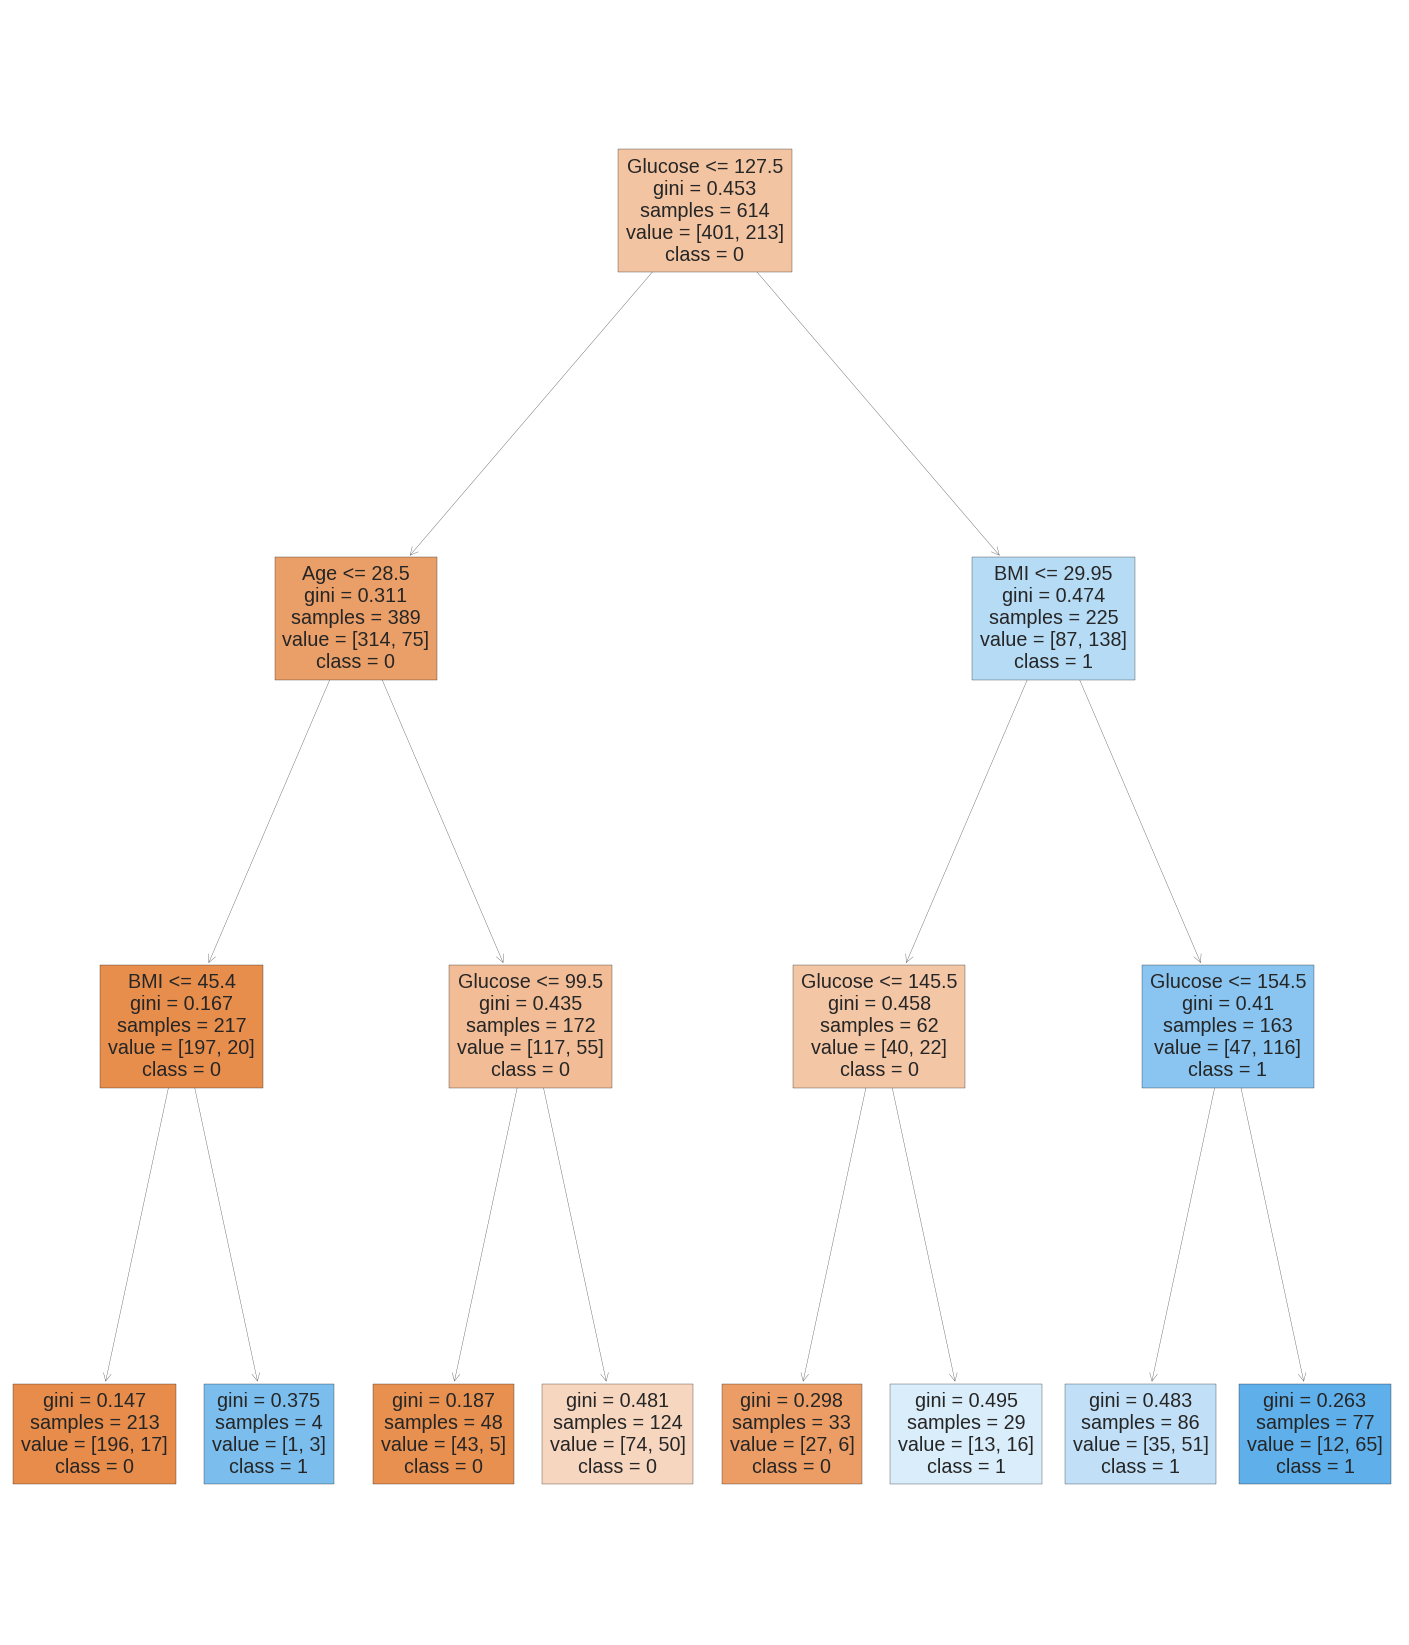

In [ ]:
feature_names=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
target_names=['0','1']
fig= plt.figure(figsize=(25,30))
plot= tree.plot_tree (clf,
                     feature_names=feature_names,
                     class_names=target_names,
                     filled=True)
fig.savefig('tree1.png')

In [ ]:
clf= DecisionTreeClassifier(criterion= 'entropy', max_depth=3)
clf.fit(x_train,y_train.ravel())
y_pred=clf.predict (x_test)

print("Accuracy: " ,metrics.accuracy_score(y_test,y_pred))



Accuracy:  0.7987012987012987


In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154



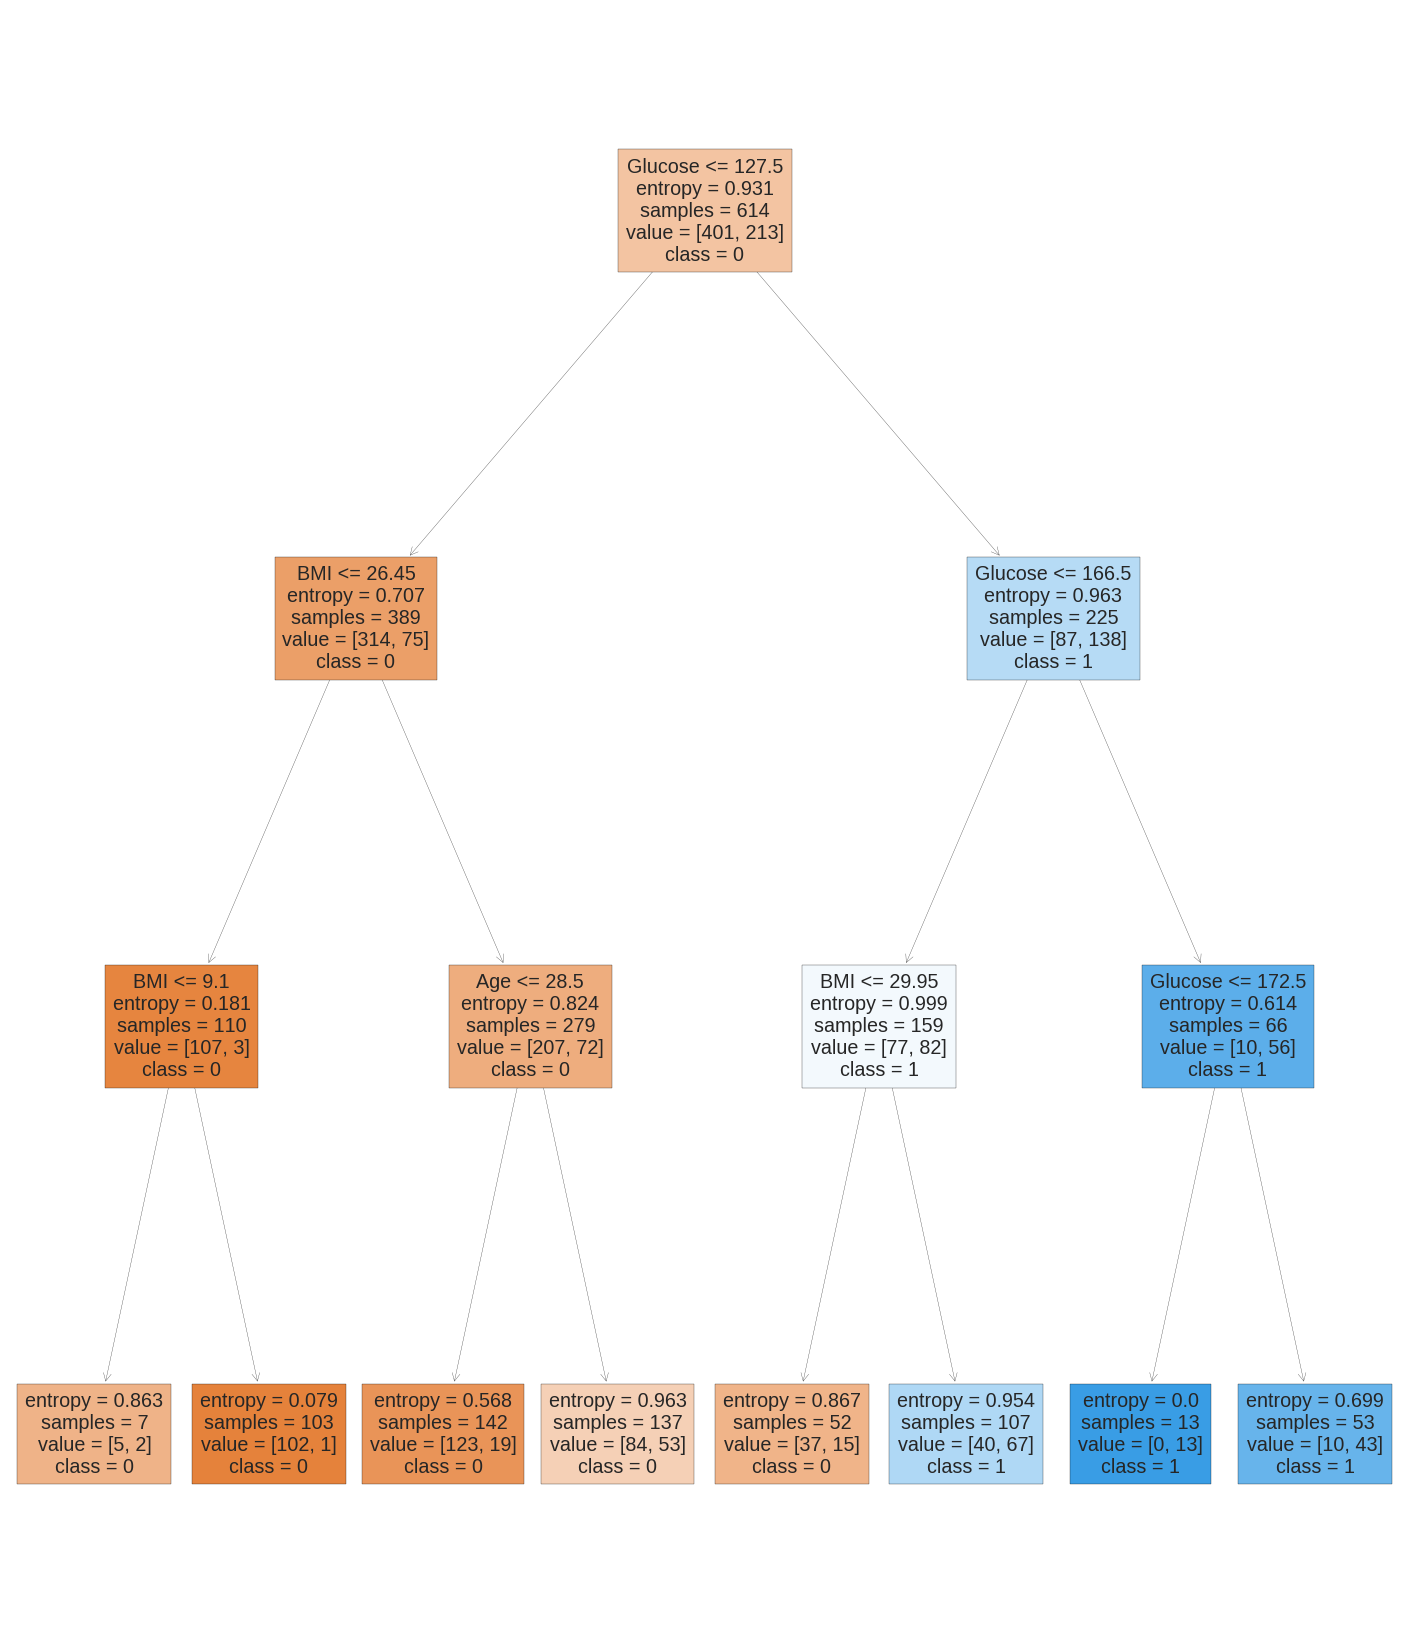

In [ ]:
feature_names=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
target_names=['0','1']
fig= plt.figure(figsize=(25,30))
plot= tree.plot_tree (clf,
                     feature_names=feature_names,
                     class_names=target_names,
                     filled=True)
fig.savefig('tree2.png')